### Читаем данные

In [78]:
import numpy as np
import pandas as pd
from sklearn import tree, ensemble
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = pd.read_csv("data/chips.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       118 non-null    float64
 1   y       118 non-null    float64
 2   class   118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [79]:
def default_graph(clf_f, points, train_X, test_X, train_Y, test_Y):
    train_scores, test_scores = [], []
    for i in points:
        clf = clf_f(i).fit(train_X, train_Y)
        train_scores.append(clf.score(train_X, train_Y))
        test_scores.append(clf.score(test_X, test_Y))

    plt.plot(points, train_scores)
    plt.plot(points, test_scores)
    plt.show()

## Дерево

### Дерево принятия решений

[Text(0.6454081632653061, 0.9545454545454546, 'X[0] <= 0.751\ngini = 0.5\nsamples = 118\nvalue = [60, 58]'),
 Text(0.6045918367346939, 0.8636363636363636, 'X[1] <= 0.703\ngini = 0.496\nsamples = 106\nvalue = [48, 58]'),
 Text(0.29081632653061223, 0.7727272727272727, 'X[0] <= -0.646\ngini = 0.463\nsamples = 85\nvalue = [31, 54]'),
 Text(0.25, 0.6818181818181818, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.33163265306122447, 0.6818181818181818, 'X[1] <= -0.572\ngini = 0.419\nsamples = 77\nvalue = [23, 54]'),
 Text(0.08163265306122448, 0.5909090909090909, 'X[0] <= 0.175\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.04081632653061224, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.12244897959183673, 0.5, 'X[0] <= 0.244\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.08163265306122448, 0.4090909090909091, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16326530612244897, 0.4090909090909091, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.58163265306122

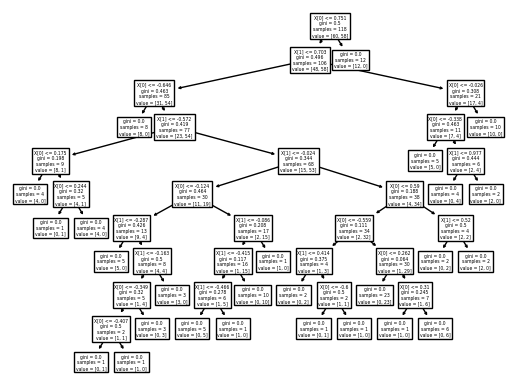

In [80]:
X, Y = list(map(list, zip(data.x.array, data.y.array))), data["class"]
clf = tree.DecisionTreeClassifier().fit(X, Y)
tree.plot_tree(clf)

### График зависимости качества классификации от глубины дерева принятия решений

In [81]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=0)

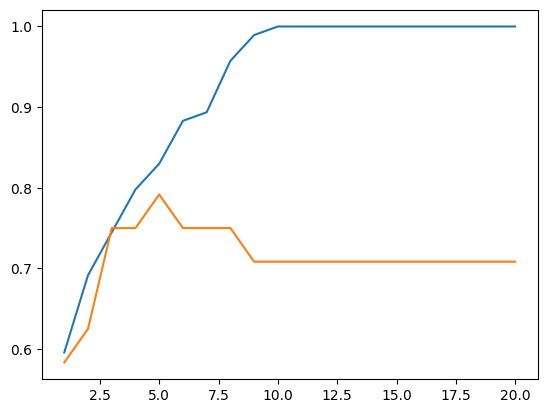

In [82]:
default_graph(
    lambda i: tree.DecisionTreeClassifier(max_depth=i),
    [*range(1, 21)],
    train_X, test_X, train_Y, test_Y
)

### График зависимости качества классификации от числа деревьев

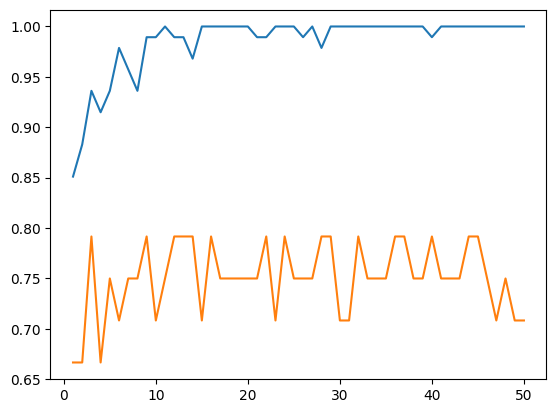

In [83]:
default_graph(
    lambda i: ensemble.RandomForestClassifier(n_estimators=i),
    [*range(1, 51)],
    train_X, test_X, train_Y, test_Y
)

## Бустинг

In [84]:
def gradient_plot(clf_f, train_X, test_X, train_Y, test_Y, n_estimators):
    clf = clf_f(n_estimators)
    train_X_X, train_X_Y = map(list, zip(*train_X))
    test_X_X, test_X_Y = map(list, zip(*test_X))
    min_x, max_x = min(train_X_X) - 0.5, max(train_X_X) + 0.5
    min_y, max_y = min(train_X_Y) - 0.5, max(train_X_Y) + 0.5
    x, y = np.meshgrid(np.arange(min_x, max_x, 0.1), np.arange(min_y, max_y, 0.1))
    r1, r2 = x.flatten(), y.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    z = clf.predict(np.hstack((r1, r2))).reshape(x.shape)

    plt.contourf(x, y, z, cmap="Paired")
    plt.title(f"n_estimators={n_estimators}")
    plt.scatter(train_X_X, train_X_Y, c=train_Y.apply(lambda x: "blue" if x else "red"))
    plt.scatter(test_X_X, test_X_Y, c=test_Y.apply(lambda x: "blue" if x else "red"))
    plt.show()

### RandomForestClassifier

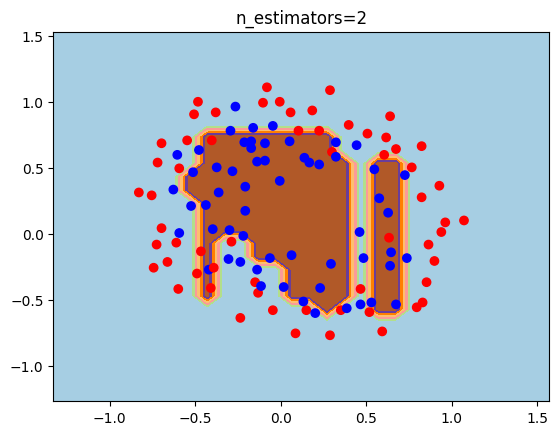

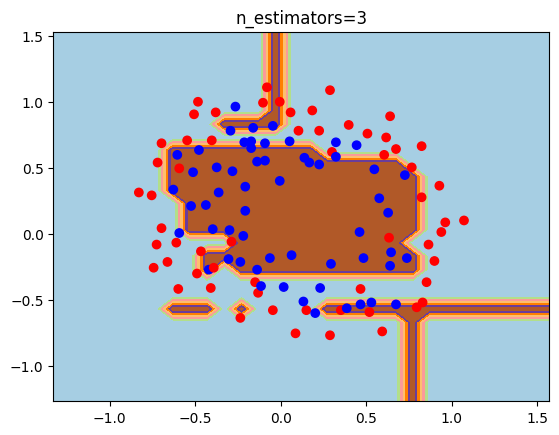

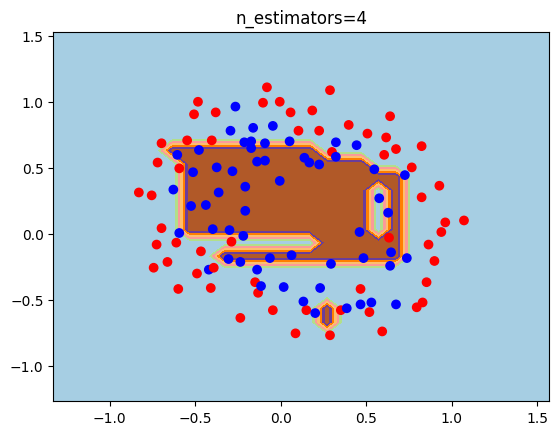

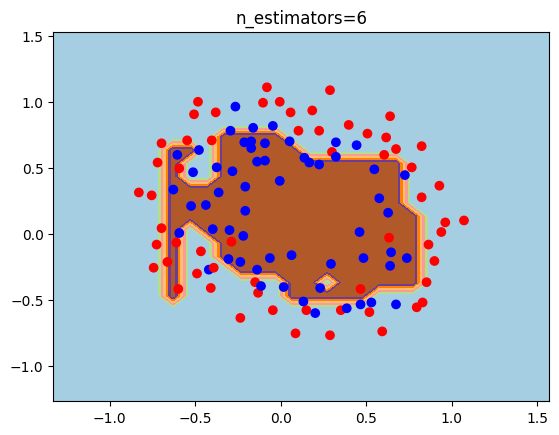

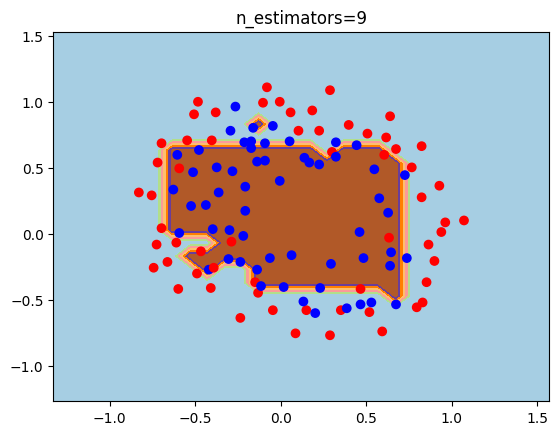

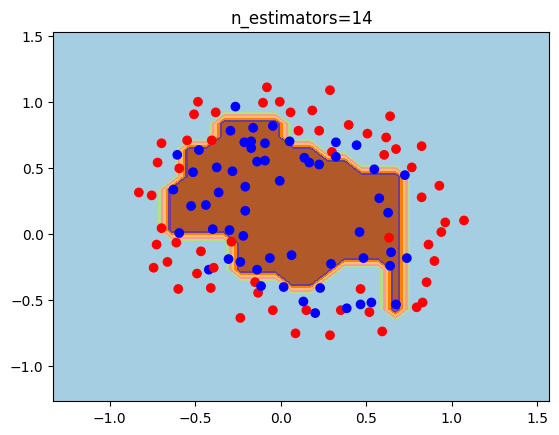

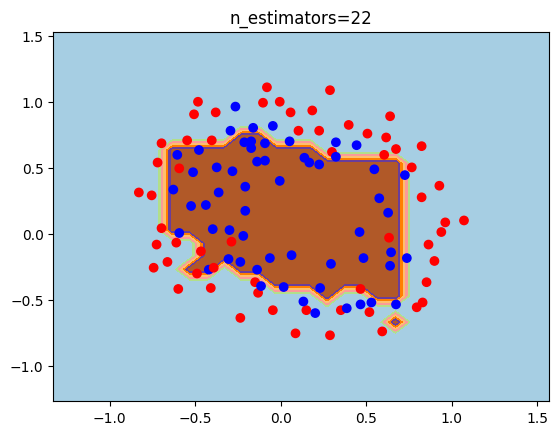

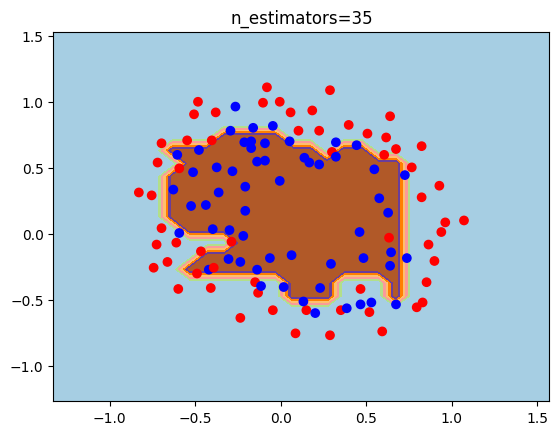

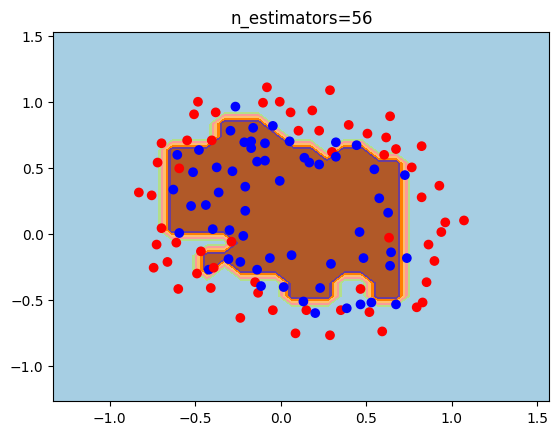

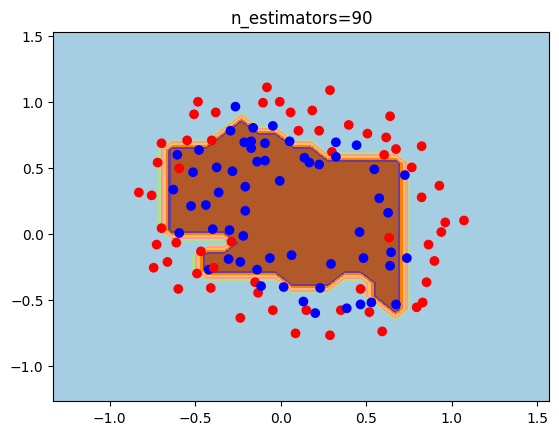

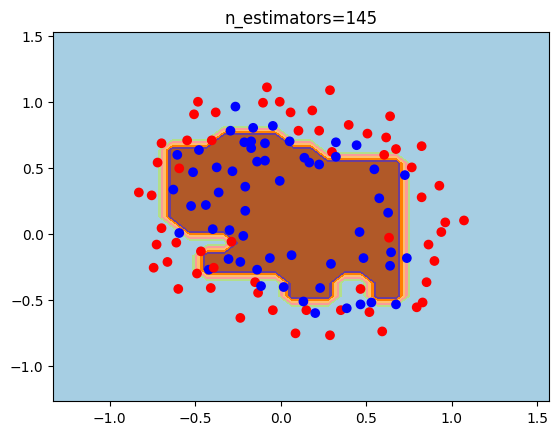

In [85]:
for i in [2, 3, 4, 6, 9, 14, 22, 35, 56, 90, 145]:
    gradient_plot(
        lambda i: ensemble.RandomForestClassifier(n_estimators=i).fit(train_X, train_Y),
        train_X, test_X, train_Y, test_Y,
        i
    )

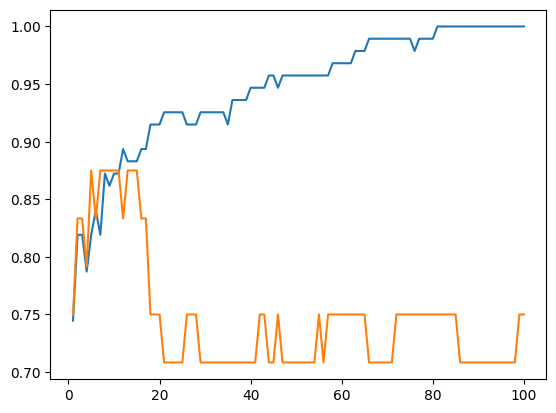

In [86]:
default_graph(
    lambda i: ensemble.GradientBoostingClassifier(n_estimators=i),
    [*range(1, 101)],
    train_X, test_X, train_Y, test_Y
)

### GradientBoostingClassifier

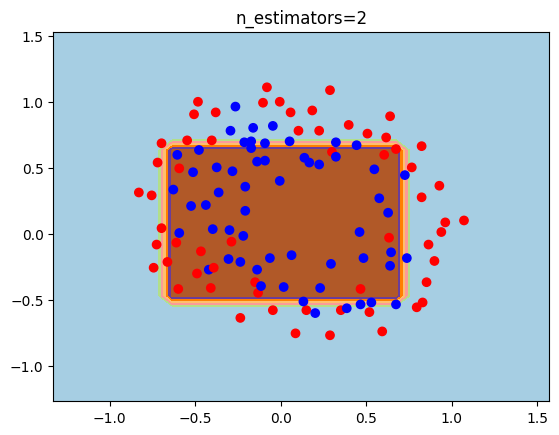

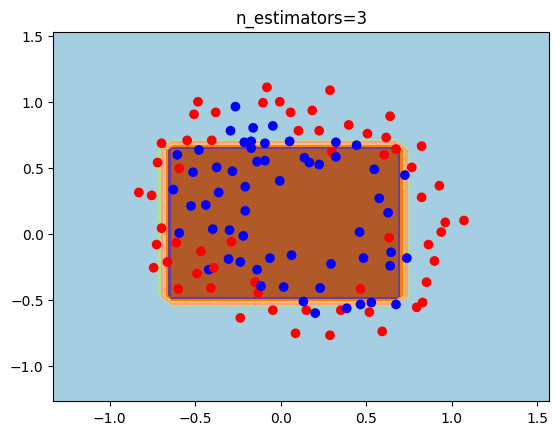

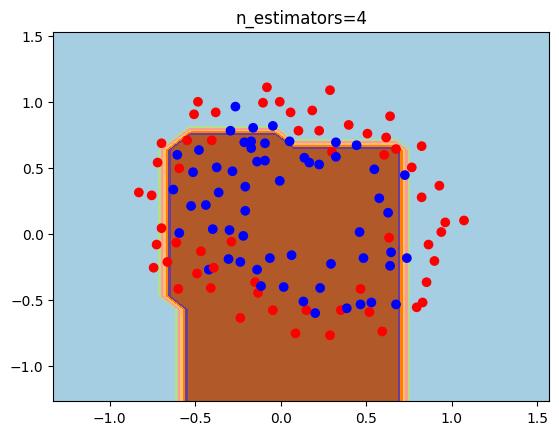

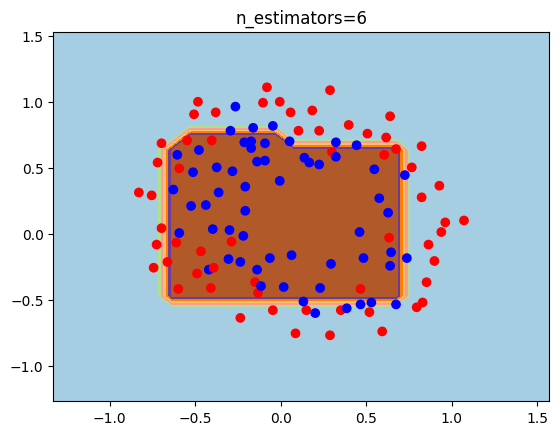

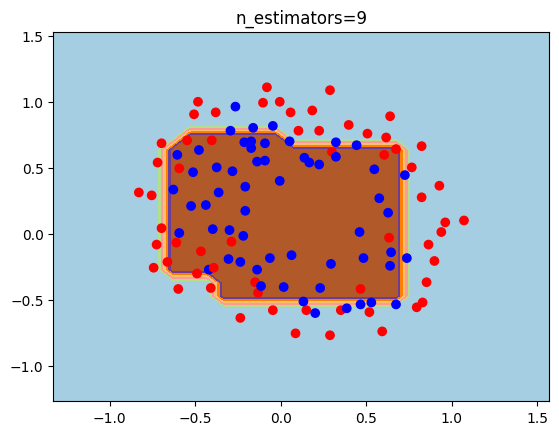

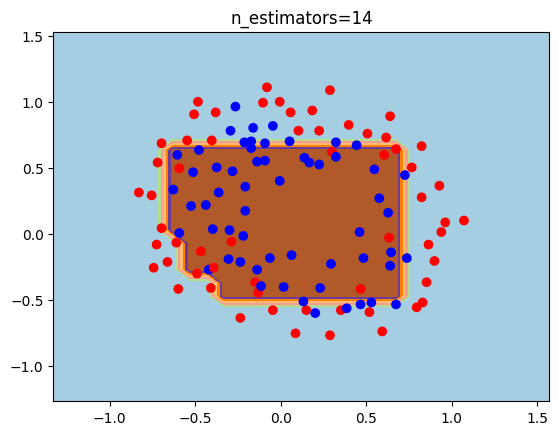

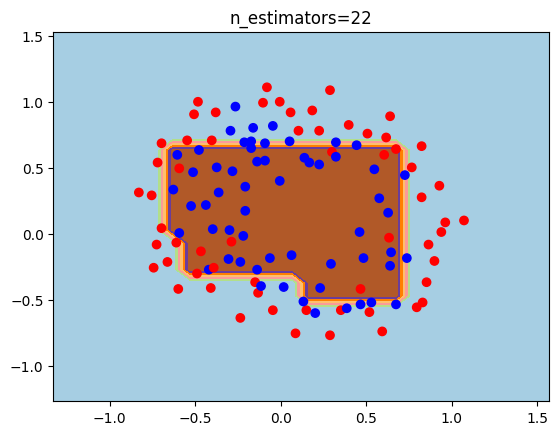

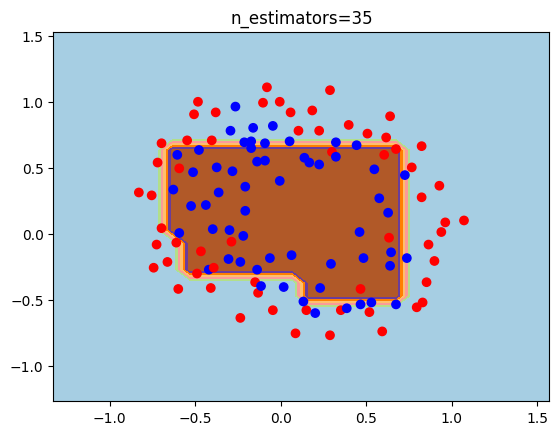

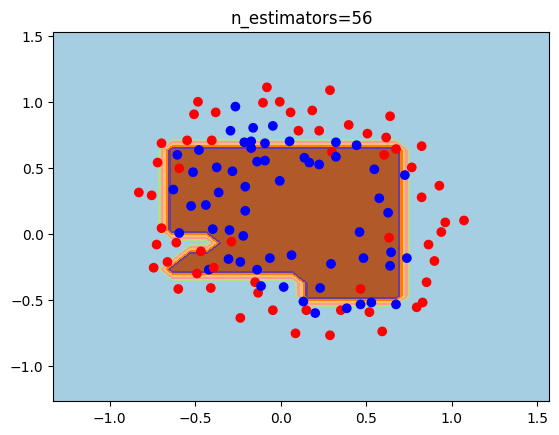

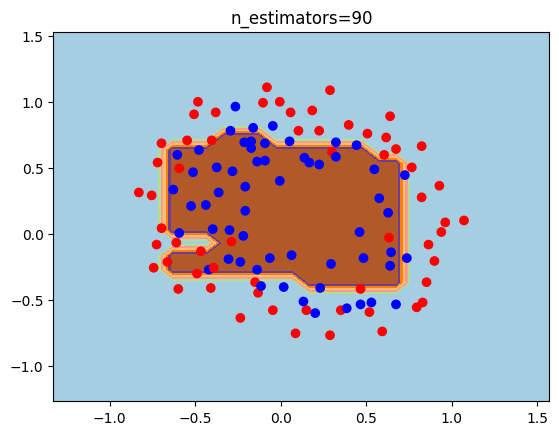

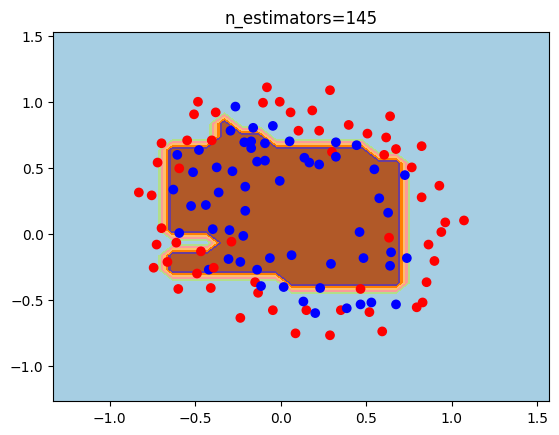

In [87]:
for i in [2, 3, 4, 6, 9, 14, 22, 35, 56, 90, 145]:
    gradient_plot(
        lambda i: ensemble.GradientBoostingClassifier(n_estimators=i).fit(train_X, train_Y),
        train_X, test_X, train_Y, test_Y,
        i
    )

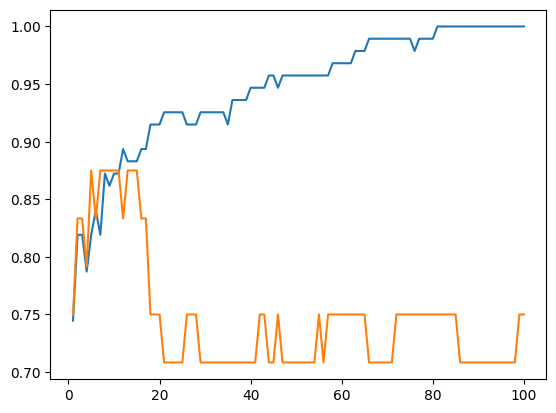

In [88]:
default_graph(
    lambda i: ensemble.GradientBoostingClassifier(n_estimators=i),
    [*range(1, 101)],
    train_X, test_X, train_Y, test_Y
)